In [1]:
from micrograd.engine import Value

In [2]:
x = Value(3)

In [3]:
y = x**2 - 6*x + 8

In [4]:
from graphviz import Digraph

In [5]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [6]:
dot = draw_dot(y)

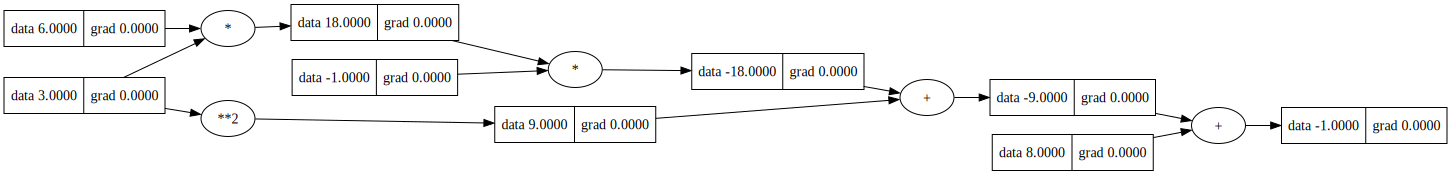

In [7]:
dot

In [8]:
y.backward()

In [9]:
dot = draw_dot(y)

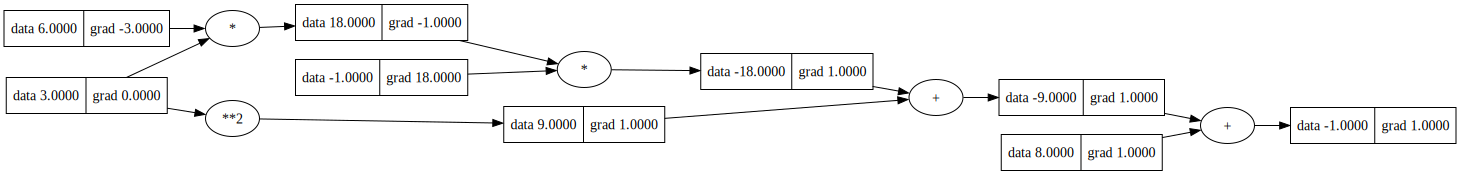

In [10]:
dot

In [11]:
y._prev

{Value(data=-9, grad=1), Value(data=8, grad=1)}

In [12]:
x._prev

set()

In [17]:
y.backward()

In [18]:
dot = draw_dot(y)

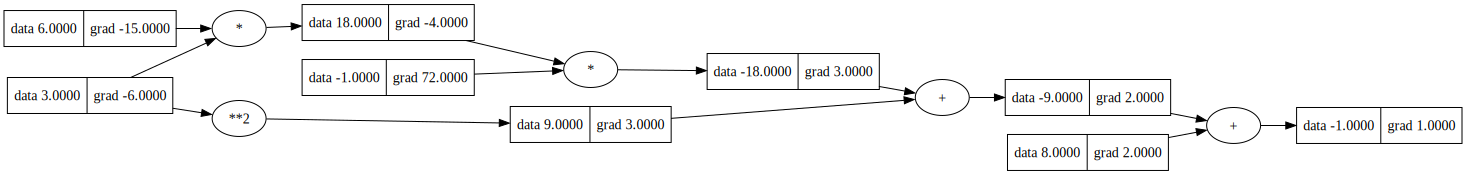

In [19]:
dot

In [20]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

In [21]:
build_topo(y)

In [22]:
topo

[Value(data=3, grad=-6),
 Value(data=9, grad=3),
 Value(data=-1, grad=72),
 Value(data=6, grad=-15),
 Value(data=18, grad=-4),
 Value(data=-18, grad=3),
 Value(data=-9, grad=2),
 Value(data=8, grad=2),
 Value(data=-1, grad=1)]

In [23]:
visited

{Value(data=-1, grad=1),
 Value(data=-1, grad=72),
 Value(data=-18, grad=3),
 Value(data=-9, grad=2),
 Value(data=18, grad=-4),
 Value(data=3, grad=-6),
 Value(data=6, grad=-15),
 Value(data=8, grad=2),
 Value(data=9, grad=3)}

In [28]:
for v in reversed(topo):
    v.grad = 0

In [29]:
dot = draw_dot(y)

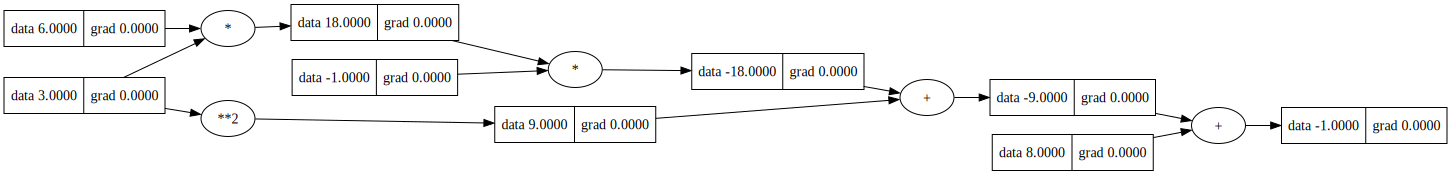

In [30]:
dot

In [31]:
def zero_grad(v):
    topo = []
    visited = set()
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(v)
    for v in topo:
        v.grad = 0

In [32]:
x

Value(data=3, grad=0)

In [33]:
paramters = [x,]

In [ ]:
for i in range(100):
    print(y)
    zero_grad(y)
    y.backward()
    for p in paramters:
        print(p)
        p.data -= 0.1 * p.grad
        